# Importing Dataset
github Link: https://github.com/sartajbhuvaji/brain-tumor-classification-dataset

Notebook link : https://www.kaggle.com/code/jaykumar1607/brain-tumor-mri-classification-tensorflow-cnn/notebook

In [39]:
!git clone https://github.com/sartajbhuvaji/brain-tumor-classification-dataset

fatal: destination path 'brain-tumor-classification-dataset' already exists and is not an empty directory.


## Importing all libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras.applications import EfficientNetB0

In [41]:
X=[]
Y=[]
image_size=(150,150)
for i in os.listdir('/content/brain-tumor-classification-dataset/Testing'):
  folder=(os.path.join('/content/brain-tumor-classification-dataset/Testing',i))
  for j in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,j))
    img=cv2.resize(img,image_size)
    X.append(img)
    Y.append(i)

In [42]:
X_array=np.array(X)
Y_array=np.array(Y)
X_array.shape,Y_array.shape

((394, 150, 150, 3), (394,))

In [43]:
ohe=OneHotEncoder()
y_ohe=ohe.fit_transform(Y_array.reshape(-1,1)).toarray()

In [44]:
y_ohe[0]

array([0., 0., 1., 0.])

In [45]:
x_train,x_test,y_train,y_test=train_test_split(X_array,y_ohe,train_size=0.8,random_state=42,)
x_train.shape,y_train.shape

((315, 150, 150, 3), (315, 4))

In [46]:
y_train.shape

(315, 4)

## Use of Data- Augmentation

In [47]:
# Define data augmentation block
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomHeight(0.1),
    layers.RandomWidth(0.1),
], name="data_augmentation")


## Model Building

Before building model, adding a important step of Data Augmentation technique on all dataset to improve dataset

In [48]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(150, 150, 3)))      # 👈 Explicit input shape
model.add(data_augmentation)                                 # ✅ Safe now
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, None, None, 32) │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, None, None, 64) │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,740 (237.27 KB)

 Trainable params: 60,740 (237.27 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),batch_size=16)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.2633 - loss: 1.3935 - val_accuracy: 0.3038 - val_loss: 1.3781
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 732ms/step - accuracy: 0.2486 - loss: 1.3807 - val_accuracy: 0.3038 - val_loss: 1.3887
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 744ms/step - accuracy: 0.3139 - loss: 1.3606 - val_accuracy: 0.3291 - val_loss: 1.3760
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 737ms/step - accuracy: 0.3186 - loss: 1.3532 - val_accuracy: 0.1392 - val_loss: 1.3772
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 815ms/step - accuracy: 0.3402 - loss: 1.3603 - val_accuracy: 0.2658 - val_loss: 1.3618


In [51]:
model.evaluate(x_test,y_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - accuracy: 0.2813 - loss: 1.3618


[1.361775279045105, 0.26582279801368713]

In [52]:
y_pred=np.argmax(model.predict(x_test),axis=1)
y_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step


array([0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2])

In [53]:
confusion_matrix(np.argmax(y_test,axis=1),y_pred)

array([[10,  1,  0,  0],
       [18,  6,  0,  0],
       [24,  0,  5,  0],
       [13,  0,  2,  0]])

In [54]:
accuracy_score(np.argmax(y_test,axis=1),y_pred)

0.26582278481012656

In [55]:
classification_report(np.argmax(y_test,axis=1),y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.15      0.91      0.26        11\n           1       0.86      0.25      0.39        24\n           2       0.71      0.17      0.28        29\n           3       0.00      0.00      0.00        15\n\n    accuracy                           0.27        79\n   macro avg       0.43      0.33      0.23        79\nweighted avg       0.54      0.27      0.26        79\n'

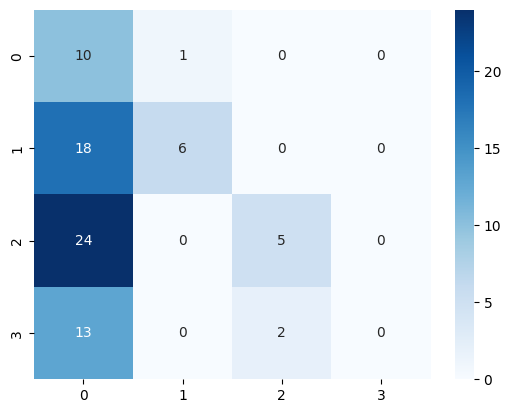

In [56]:
import seaborn as sns
sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),y_pred),annot=True,cmap='Blues',fmt='d')
plt.show()

## Transfer Learning
Deep convolutional neural network models may take days or even weeks to train on very large datasets.

A way to short-cut this process is to re-use the model weights from pre-trained models that were developed for standard computer vision benchmark datasets, such as the ImageNet image recognition tasks. Top performing models can be downloaded and used directly, or integrated into a new model for your own computer vision problems.

In this notebook, I'll be using the EfficientNetB0 model which will use the weights from the ImageNet dataset.

The include_top parameter is set to False so that the network doesn't include the top layer/ output layer from the pre-built model which allows us to add our own output layer depending upon our use case!

In [57]:
effnet=EfficientNetB0(include_top=False,input_shape=(150,150,3),weights='imagenet',pooling='max',)

In [58]:
effnet.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 150, 150,  │          0 │ input_layer_6[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 150, 150,  │          7 │ rescaling_5[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_6         │ (None, 150, 150,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_6[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [59]:
model = effnet.output
model = layers.Dropout(rate=0.5)(model)
model = layers.Dense(4,activation='softmax')(model)
model = models.Model(inputs=effnet.input, outputs = model)
model.summary()

Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 150, 150,  │          0 │ input_layer_6[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 150, 150,  │          7 │ rescaling_5[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_6         │ (None, 150, 150,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_6[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        512 │ block1a_se_excit

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [63]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy']) # Change loss function to 'categorical_crossentropy'

In [64]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),batch_size=16)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.3869 - loss: 4.5980 - val_accuracy: 0.3797 - val_loss: 1.6553
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.6607 - loss: 1.8285 - val_accuracy: 0.4430 - val_loss: 6.0254
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7932 - loss: 1.0698 - val_accuracy: 0.7089 - val_loss: 2.3767
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7620 - loss: 1.3092 - val_accuracy: 0.7342 - val_loss: 1.1309
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8136 - loss: 0.5881 - val_accuracy: 0.7848 - val_loss: 3.1531


In [66]:
model.evaluate(x_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7635 - loss: 4.1647


[3.1531407833099365, 0.7848101258277893]

In [67]:
print(classification_report(np.argmax(y_test,axis=1),np.argmax(model.predict(x_test),axis=1)))

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
              precision    recall  f1-score   support

           0       0.44      0.73      0.55        11
           1       1.00      0.58      0.74        24
           2       0.79      0.93      0.86        29
           3       1.00      0.87      0.93        15

    accuracy                           0.78        79
   macro avg       0.81      0.78      0.77        79
weighted avg       0.85      0.78      0.79        79

